In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
ipl = pd.read_csv('/content/drive/MyDrive/ipl_data (1).csv')
ipl.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'mid', 'striker', 'non-striker'], axis=1)
X = df.drop(['total'], axis=1)  #target variable
y = df['total']

In [5]:
# Label Encoding for categorical columns
label_encoders = {}
for column in X.columns:
    if X[column].dtype == np.object:  # Check if the column is categorical
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

<ipython-input-5-373ed2f89d4b>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if X[column].dtype == np.object:  # Check if the column is categorical
<ipython-input-5-373ed2f89d4b>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if X[column].dtype == np.object:  # Check if the column is categorical
<ipython-input-5-373ed2f89d4b>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this wi

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Normalize target variable y
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1))


In [8]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1])),
    keras.layers.Dense(2048, activation= 'relu'),  # Increase units in the first hidden layer
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation= 'relu'),# Adjust hidden layers and units
    keras.layers.Dense(256, activation= 'relu'),  # Add more layers or units as needed
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=148, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/50
360/360 [==============================] - 41s 111ms/step - loss: 0.0254 - val_loss: 0.0220
Epoch 2/50
360/360 [==============================] - 39s 110ms/step - loss: 0.0215 - val_loss: 0.0208
Epoch 3/50
360/360 [==============================] - 44s 122ms/step - loss: 0.0204 - val_loss: 0.0203
Epoch 4/50
360/360 [==============================] - 40s 110ms/step - loss: 0.0195 - val_loss: 0.0199
Epoch 5/50
360/360 [==============================] - 39s 110ms/step - loss: 0.0184 - val_loss: 0.0185
Epoch 6/50
360/360 [==============================] - 41s 115ms/step - loss: 0.0172 - val_loss: 0.0166
Epoch 7/50
360/360 [==============================] - 41s 113ms/step - loss: 0.0154 - val_loss: 0.0150
Epoch 8/50
360/360 [==============================] - 40s 110ms/step - loss: 0.0142 - val_loss: 0.0137
Epoch 9/50
360/360 [==============================] - 39s 109ms/step - loss: 0.0128 - val_loss: 0.0122
Epoch 10/50
360/360 [==============================] - 42s 117ms/step - l

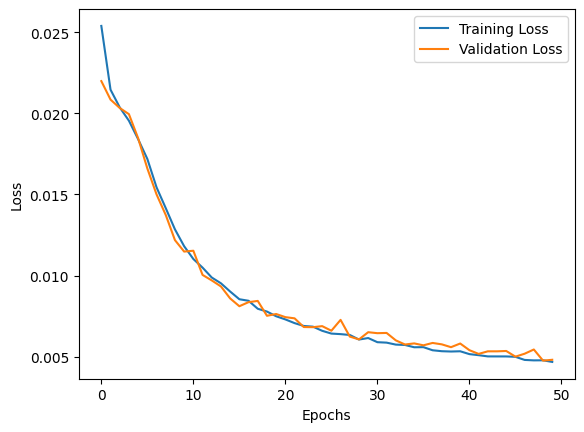

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_scaled, predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error

# Inverse transform the scaled predictions to original values
inverse_predicted = scaler_y.inverse_transform(predictions)

mse = mean_squared_error(y_test, inverse_predicted)
print(f"Mean Squared Error: {mse}")
accuracy = 100 - mae * 100

print(f'Accuracy: {accuracy:.4f}')

713/713 [==============================] - 6s 9ms/step
Mean Absolute Error: 0.041673542681622454
Mean Squared Error: 184.70161562012356
Accuracy: 95.8326


In [13]:
# Create prediction interface using widgets
venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:')
batting_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')
predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output

        try:
            # Decode the encoded values back to their original values
            decoded_venue = label_encoders['venue'].transform([venue.value])
            decoded_batting_team = label_encoders['bat_team'].transform([batting_team.value])
            decoded_bowling_team = label_encoders['bowl_team'].transform([bowling_team.value])
            decoded_striker = label_encoders['batsman'].transform([striker.value])
            decoded_bowler = label_encoders['bowler'].transform([bowler.value])

            input_data = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_striker, decoded_bowler])
            input_data = input_data.reshape(1, 5)
            input_data = scaler.transform(input_data)

            predicted_score = model.predict(input_data)
            predicted_score = scaler_y.inverse_transform(predicted_score)
            print(f"Predicted Score: {int(predicted_score[0, 0])}")
        except ValueError as e:
            print("Please select valid values for all dropdowns.")

predict_button.on_click(predict_score)
output = widgets.Output()
input_widgets = widgets.VBox([venue, batting_team, bowling_team, striker, bowler, predict_button])
display(input_widgets, output)

Output()